In [4]:
# Import pandas
import pandas as pd

# Import yfinance
import yfinance as yf

# Import numpy
import numpy as np

# Import plot lib
import matplotlib.pyplot as plt

# Import evaluate library
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, root_mean_squared_error, mean_absolute_error

# Import the required libraries
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [5]:
# 'BTC-USD': 'Bitcoin USD',
# 'ETH-USD': 'Ethereum USD',
# 'SOL-USD': 'Solana USD'

crypto = "BTC-USD"
crypto_data = yf.Ticker(crypto)
try:
    info = crypto_data.info
    if info:  # Check if info is not empty
        for key, value in info.items():
            print(key, ' : ', value)
    else:
        print("No information available for the selected cryptocurrency.")
except Exception as e:
    print(f"An error occurred while fetching the information: {e}")

companyOfficers  :  []
name  :  Bitcoin
startDate  :  1278979200
description  :  Bitcoin (BTC) is a cryptocurrency launched in 2010. Users are able to generate BTC through the process of mining. Bitcoin has a current supply of 19,838,918. The last known price of Bitcoin is 83,477.39501709 USD and is up 0.51 over the last 24 hours. It is currently trading on 11982 active market(s) with $23,514,621,740.72 traded over the last 24 hours. More information can be found at https://bitcoin.org/.
executiveTeam  :  []
maxAge  :  86400
priceHint  :  2
previousClose  :  86870.87
open  :  86870.87
dayLow  :  85743.75
dayHigh  :  87427.31
regularMarketPreviousClose  :  86870.87
regularMarketOpen  :  86870.87
regularMarketDayLow  :  85743.75
regularMarketDayHigh  :  87427.31
volume  :  36134141952
regularMarketVolume  :  36134141952
averageVolume  :  47198447270
averageVolume10days  :  32518714121
averageDailyVolume10Day  :  32518714121
marketCap  :  1704625438720
fiftyTwoWeekLow  :  49121.24
fiftyTw

In [6]:
# Valid intervals: [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]

# Period must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']

interval = "5m"
period = "5d"

In [7]:
crypto_data_hist = crypto_data.history(interval=interval,period=period)
print(crypto_data_hist)

                                   Open          High           Low  \
Datetime                                                              
2025-03-16 00:00:00+00:00  84354.531250  84354.531250  84329.890625   
2025-03-16 00:05:00+00:00  84356.492188  84356.492188  84277.375000   
2025-03-16 00:10:00+00:00  84287.625000  84345.625000  84287.625000   
2025-03-16 00:15:00+00:00  84333.703125  84333.703125  84311.476562   
2025-03-16 00:20:00+00:00  84297.992188  84297.992188  84284.687500   
...                                 ...           ...           ...   
2025-03-20 03:00:00+00:00  86082.703125  86082.703125  86036.281250   
2025-03-20 03:05:00+00:00  86040.148438  86131.289062  86040.148438   
2025-03-20 03:10:00+00:00  86140.390625  86140.390625  85991.515625   
2025-03-20 03:15:00+00:00  85991.656250  86087.000000  85991.656250   
2025-03-20 03:20:00+00:00  86015.570312  86015.570312  85921.882812   

                                  Close     Volume  Dividends  Stock Splits 

In [8]:
# Clean the data for to keep only the required columns
crypto_data_close = crypto_data_hist[["Close"]]
print(crypto_data_close)

                                  Close
Datetime                               
2025-03-16 00:00:00+00:00  84351.421875
2025-03-16 00:05:00+00:00  84277.726562
2025-03-16 00:10:00+00:00  84345.625000
2025-03-16 00:15:00+00:00  84311.476562
2025-03-16 00:20:00+00:00  84295.976562
...                                 ...
2025-03-20 03:00:00+00:00  86036.281250
2025-03-20 03:05:00+00:00  86131.289062
2025-03-20 03:10:00+00:00  85991.515625
2025-03-20 03:15:00+00:00  86087.000000
2025-03-20 03:20:00+00:00  85921.882812

[1193 rows x 1 columns]


In [9]:
# Fill missing values
crypto_data_close = crypto_data_close.ffill()
print(crypto_data_close)

                                  Close
Datetime                               
2025-03-16 00:00:00+00:00  84351.421875
2025-03-16 00:05:00+00:00  84277.726562
2025-03-16 00:10:00+00:00  84345.625000
2025-03-16 00:15:00+00:00  84311.476562
2025-03-16 00:20:00+00:00  84295.976562
...                                 ...
2025-03-20 03:00:00+00:00  86036.281250
2025-03-20 03:05:00+00:00  86131.289062
2025-03-20 03:10:00+00:00  85991.515625
2025-03-20 03:15:00+00:00  86087.000000
2025-03-20 03:20:00+00:00  85921.882812

[1193 rows x 1 columns]


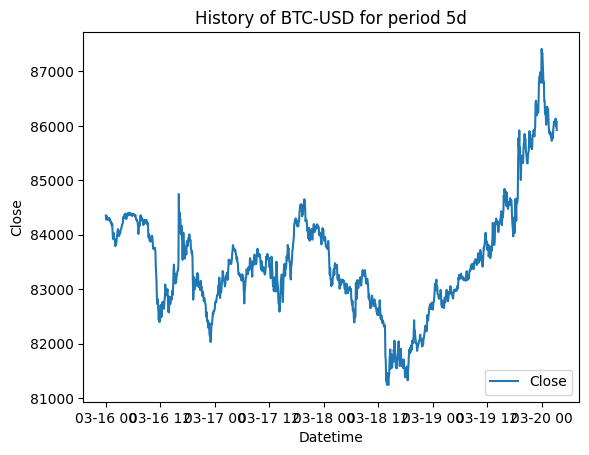

In [10]:
plt.title(f"History of {crypto} for period {period}")
plt.xlabel('Datetime')
plt.ylabel('Close')
 
plt.plot(crypto_data_hist['Close'])

plt.legend(['Close'], loc='lower right')

plt.show()

In [11]:
# Clean the data for to keep only the required columns
crypto_data_close = crypto_data_hist[["Close"]]
print(crypto_data_close)

                                  Close
Datetime                               
2025-03-16 00:00:00+00:00  84351.421875
2025-03-16 00:05:00+00:00  84277.726562
2025-03-16 00:10:00+00:00  84345.625000
2025-03-16 00:15:00+00:00  84311.476562
2025-03-16 00:20:00+00:00  84295.976562
...                                 ...
2025-03-20 03:00:00+00:00  86036.281250
2025-03-20 03:05:00+00:00  86131.289062
2025-03-20 03:10:00+00:00  85991.515625
2025-03-20 03:15:00+00:00  86087.000000
2025-03-20 03:20:00+00:00  85921.882812

[1193 rows x 1 columns]


In [12]:
# Fill missing values
crypto_data_close = crypto_data_close.ffill()
print(crypto_data_close)

                                  Close
Datetime                               
2025-03-16 00:00:00+00:00  84351.421875
2025-03-16 00:05:00+00:00  84277.726562
2025-03-16 00:10:00+00:00  84345.625000
2025-03-16 00:15:00+00:00  84311.476562
2025-03-16 00:20:00+00:00  84295.976562
...                                 ...
2025-03-20 03:00:00+00:00  86036.281250
2025-03-20 03:05:00+00:00  86131.289062
2025-03-20 03:10:00+00:00  85991.515625
2025-03-20 03:15:00+00:00  86087.000000
2025-03-20 03:20:00+00:00  85921.882812

[1193 rows x 1 columns]


In [13]:
# Scale into range 0..1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(crypto_data_close)
print(scaled_data)

[[0.50415831]
 [0.49222119]
 [0.50321934]
 ...
 [0.7698197 ]
 [0.7852862 ]
 [0.75854062]]


In [14]:
# Define train size
split = 0.8
train_size = int(len(scaled_data) * split)
print(train_size)

954


In [15]:
# Define training and testing area before scaled
train_data = crypto_data_close[:train_size]
test_data = crypto_data_close[train_size:]
print("Data Training")
print(train_data)
print("Data Testing")
print(test_data)

Data Training
                                  Close
Datetime                               
2025-03-16 00:00:00+00:00  84351.421875
2025-03-16 00:05:00+00:00  84277.726562
2025-03-16 00:10:00+00:00  84345.625000
2025-03-16 00:15:00+00:00  84311.476562
2025-03-16 00:20:00+00:00  84295.976562
...                                 ...
2025-03-19 07:05:00+00:00  83179.960938
2025-03-19 07:10:00+00:00  83175.632812
2025-03-19 07:15:00+00:00  83150.195312
2025-03-19 07:20:00+00:00  83245.867188
2025-03-19 07:25:00+00:00  83262.117188

[954 rows x 1 columns]
Data Testing
                                  Close
Datetime                               
2025-03-19 07:30:00+00:00  83329.242188
2025-03-19 07:35:00+00:00  83180.320312
2025-03-19 07:40:00+00:00  83166.078125
2025-03-19 07:45:00+00:00  83187.187500
2025-03-19 07:50:00+00:00  83217.351562
...                                 ...
2025-03-20 03:00:00+00:00  86036.281250
2025-03-20 03:05:00+00:00  86131.289062
2025-03-20 03:10:00+00:00  85

In [16]:
# Define training and testing area after scaled
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]
print("Data Training")
print(train_data)
print("Data Testing")
print(test_data)

Data Training
[[5.04158315e-01]
 [4.92221193e-01]
 [5.03219340e-01]
 [4.97687997e-01]
 [4.95177317e-01]
 [4.92217397e-01]
 [4.91370801e-01]
 [4.91170858e-01]
 [4.96865446e-01]
 [4.89299237e-01]
 [4.95084938e-01]
 [4.90711494e-01]
 [4.89435907e-01]
 [4.83675515e-01]
 [4.80644729e-01]
 [4.83312327e-01]
 [4.73293648e-01]
 [4.79228674e-01]
 [4.51950333e-01]
 [4.34645113e-01]
 [4.46804957e-01]
 [4.52195833e-01]
 [4.32565956e-01]
 [4.34795703e-01]
 [4.31883871e-01]
 [4.13044909e-01]
 [4.15188605e-01]
 [4.18019448e-01]
 [4.25099719e-01]
 [4.36224412e-01]
 [4.50309026e-01]
 [4.58318148e-01]
 [4.63712821e-01]
 [4.49843336e-01]
 [4.52302132e-01]
 [4.42770657e-01]
 [4.50359645e-01]
 [4.56680637e-01]
 [4.51088552e-01]
 [4.59505153e-01]
 [4.64634078e-01]
 [4.65531292e-01]
 [4.71456195e-01]
 [4.77133066e-01]
 [4.79305868e-01]
 [4.82241744e-01]
 [4.99867126e-01]
 [4.98323260e-01]
 [4.95917613e-01]
 [5.06782887e-01]
 [5.07300462e-01]
 [5.08673490e-01]
 [5.09712436e-01]
 [5.02305675e-01]
 [4.93565116e-

In [17]:
# lookback = 5
# [30, 31, 94, 50, 27, 68, 37, 69, 27, 57, 25, 48, 50]
# train data  =   [30, 31, 94, 50, 27] => 68
#                 [31, 94, 50, 27, 68] => 37
#                 [94, 50, 27, 68, 37] => 69
#                 ...
#                 [69, 27, 57, 25, 48] => 50
# x train data = ([30, 31, 94, 50, 27], [31, 94, 50, 27, 68], [94, 50, 27, 68, 37], ..., [69, 27, 57, 25, 48])
# y train data = (68, 37, 69, 27, 57, 25, 48, 50)
lookback = int(24*60/5/2)
x_data = []
y_data = []
for i in range(lookback,len(scaled_data)):
    x_data.append(scaled_data[i-lookback:i,0])
    y_data.append(scaled_data[i,0])

# Converting the x and y values to numpy arrays
x_data, y_data = np.array(x_data), np.array(y_data)

# Reshaping x and y data to make the calculations easier
x_data = np.reshape(x_data, (x_data.shape[0],x_data.shape[1],1))
y_data = np.reshape(y_data, (y_data.shape[0],1))
print(f"X Data : {x_data.shape}")
print(x_data)
print(f"Y Data : {y_data.shape}")
print(y_data)

X Data : (1049, 144, 1)
[[[0.50415831]
  [0.49222119]
  [0.50321934]
  ...
  [0.21611594]
  [0.18702672]
  [0.19297313]]

 [[0.49222119]
  [0.50321934]
  [0.497688  ]
  ...
  [0.18702672]
  [0.19297313]
  [0.20551388]]

 [[0.50321934]
  [0.497688  ]
  [0.49517732]
  ...
  [0.19297313]
  [0.20551388]
  [0.23794646]]

 ...

 [[0.50328768]
  [0.47558793]
  [0.49995697]
  ...
  [0.78482683]
  [0.77707081]
  [0.79246011]]

 [[0.47558793]
  [0.49995697]
  [0.49777785]
  ...
  [0.77707081]
  [0.79246011]
  [0.7698197 ]]

 [[0.49995697]
  [0.49777785]
  [0.50921258]
  ...
  [0.79246011]
  [0.7698197 ]
  [0.7852862 ]]]
Y Data : (1049, 1)
[[0.20551388]
 [0.23794646]
 [0.22092343]
 ...
 [0.7698197 ]
 [0.7852862 ]
 [0.75854062]]


In [18]:
xy_train_size = int(x_data.shape[0]*split)
print(xy_train_size)

839


In [19]:
x_train_data = x_data[:xy_train_size,:,:]
y_train_data = y_data[:xy_train_size,:]
print("X Train Data")
print(x_train_data)
print("Y Train Data")
print(y_train_data)

X Train Data
[[[0.50415831]
  [0.49222119]
  [0.50321934]
  ...
  [0.21611594]
  [0.18702672]
  [0.19297313]]

 [[0.49222119]
  [0.50321934]
  [0.497688  ]
  ...
  [0.18702672]
  [0.19297313]
  [0.20551388]]

 [[0.50321934]
  [0.497688  ]
  [0.49517732]
  ...
  [0.19297313]
  [0.20551388]
  [0.23794646]]

 ...

 [[0.1142018 ]
  [0.1185436 ]
  [0.11750339]
  ...
  [0.37394966]
  [0.37339286]
  [0.37347891]]

 [[0.1185436 ]
  [0.11750339]
  [0.1213213 ]
  ...
  [0.37339286]
  [0.37347891]
  [0.36324257]]

 [[0.11750339]
  [0.1213213 ]
  [0.14173956]
  ...
  [0.37347891]
  [0.36324257]
  [0.35704939]]]
Y Train Data
[[2.05513880e-01]
 [2.37946456e-01]
 [2.20923434e-01]
 [2.02143949e-01]
 [2.16977718e-01]
 [2.41918747e-01]
 [2.47088167e-01]
 [2.39737087e-01]
 [2.33814716e-01]
 [2.30675100e-01]
 [2.26316842e-01]
 [2.50585910e-01]
 [2.58357124e-01]
 [2.98763389e-01]
 [2.85956893e-01]
 [2.66363715e-01]
 [2.71876076e-01]
 [2.69347679e-01]
 [2.78126202e-01]
 [2.84853409e-01]
 [2.62293982e-01]
 [

In [20]:

x_test_data = x_data[xy_train_size:,:,:]
y_test_data = y_data[xy_train_size:,:]
print("X Test Data")
print(x_test_data)
print("Y Test Data")
print(y_test_data)

X Test Data
[[[0.1213213 ]
  [0.14173956]
  [0.14148267]
  ...
  [0.36324257]
  [0.35704939]
  [0.36245925]]

 [[0.14173956]
  [0.14148267]
  [0.15229732]
  ...
  [0.35704939]
  [0.36245925]
  [0.37084169]]

 [[0.14148267]
  [0.15229732]
  [0.15738449]
  ...
  [0.36245925]
  [0.37084169]
  [0.39184206]]

 ...

 [[0.50328768]
  [0.47558793]
  [0.49995697]
  ...
  [0.78482683]
  [0.77707081]
  [0.79246011]]

 [[0.47558793]
  [0.49995697]
  [0.49777785]
  ...
  [0.77707081]
  [0.79246011]
  [0.7698197 ]]

 [[0.49995697]
  [0.49777785]
  [0.50921258]
  ...
  [0.79246011]
  [0.7698197 ]
  [0.7852862 ]]]
Y Test Data
[[0.37084169]
 [0.39184206]
 [0.3804377 ]
 [0.36402716]
 [0.37144278]
 [0.36912065]
 [0.37262219]
 [0.40161903]
 [0.39243809]
 [0.37211854]
 [0.38400251]
 [0.37516831]
 [0.36467634]
 [0.35209763]
 [0.3652534 ]
 [0.38966673]
 [0.40899163]
 [0.40584062]
 [0.41664009]
 [0.42397092]
 [0.4424138 ]
 [0.45290449]
 [0.43539806]
 [0.424939  ]
 [0.42624117]
 [0.4070251 ]
 [0.40182277]
 [0.

In [21]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train_data.shape[1],x_train_data.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

model.summary()

epoch = 200

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train_data, y_train_data, epochs=epoch, batch_size=32)

I0000 00:00:1742441108.079366   17031 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1730 MB memory:  -> device: 0, name: NVIDIA GeForce MX330, pci bus id: 0000:01:00.0, compute capability: 6.1
/home/acelanchester/miniconda/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 144, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200


I0000 00:00:1742441111.042556   17275 cuda_dnn.cc:529] Loaded cuDNN version 90300


27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0302
Epoch 2/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0024
Epoch 3/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0014
Epoch 4/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - loss: 0.0013
Epoch 5/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0011
Epoch 6/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0012
Epoch 7/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0012
Epoch 8/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0011
Epoch 9/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0012
Epoch 10/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0012
Epoch 11/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.9545e-04
Epoch 12/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0011
Epoch 13/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 9.4195e-04
Epoch 14/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 9.0186e-04
Epoch 15/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - l

In [22]:
# Save the model to a file
model.save('rnnbtc5min.keras')

In [23]:
# Predict data for test data
predictions = model.predict(x_test_data)
predictions = scaler.inverse_transform(predictions)
print(predictions)

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 275ms/step
[[83444.766]
 [83494.01 ]
 [83615.31 ]
 [83555.875]
 [83459.29 ]
 [83497.51 ]
 [83487.05 ]
 [83506.16 ]
 [83671.734]
 [83626.95 ]
 [83508.24 ]
 [83571.21 ]
 [83525.02 ]
 [83463.07 ]
 [83389.42 ]
 [83460.5  ]
 [83602.75 ]
 [83718.805]
 [83704.5  ]
 [83764.69 ]
 [83809.445]
 [83916.61 ]
 [83980.77 ]
 [83881.74 ]
 [83819.17 ]
 [83826.57 ]
 [83718.02 ]
 [83685.02 ]
 [83742.04 ]
 [83778.9  ]
 [83576.74 ]
 [83618.99 ]
 [83745.84 ]
 [83609.055]
 [83540.54 ]
 [83557.68 ]
 [83579.445]
 [83728.47 ]
 [83668.875]
 [83783.55 ]
 [83865.79 ]
 [84147.734]
 [83954.055]
 [83835.19 ]
 [83769.16 ]
 [83772.234]
 [83820.93 ]
 [84109.65 ]
 [84173.93 ]
 [84141.016]
 [84230.31 ]
 [84179.88 ]
 [84135.7  ]
 [84144.18 ]
 [84183.18 ]
 [84017.63 ]
 [84000.66 ]
 [84100.79 ]
 [84142.04 ]
 [84169.086]
 [84182.71 ]
 [84227.516]
 [84265.09 ]
 [84364.734]
 [84287.234]
 [84124.734]
 [84264.69 ]
 [84256.72 ]
 [84321.18 ]
 [84376.07 ]
 [84641.34 ]
 [84536.27 ]
 [84752.914]
 [84649.02 ]

In [24]:
y_test = y_test_data.reshape(y_test_data.shape[0],1)
y_test = scaler.inverse_transform(y_test)
print(y_test)

[[83528.375    ]
 [83658.0234375]
 [83587.6171875]
 [83486.3046875]
 [83532.0859375]
 [83517.75     ]
 [83539.3671875]
 [83718.3828125]
 [83661.703125 ]
 [83536.2578125]
 [83609.625    ]
 [83555.0859375]
 [83490.3125   ]
 [83412.65625  ]
 [83493.875    ]
 [83644.59375  ]
 [83763.8984375]
 [83744.4453125]
 [83811.1171875]
 [83856.375    ]
 [83970.234375 ]
 [84035.       ]
 [83926.921875 ]
 [83862.3515625]
 [83870.390625 ]
 [83751.7578125]
 [83719.640625 ]
 [83781.4609375]
 [83818.71875  ]
 [83599.5390625]
 [83653.8671875]
 [83788.015625 ]
 [83635.4375   ]
 [83568.1640625]
 [83589.1328125]
 [83611.9453125]
 [83773.1875   ]
 [83702.6875   ]
 [83830.796875 ]
 [83914.1875   ]
 [84215.5546875]
 [83999.546875 ]
 [83879.4140625]
 [83808.6796875]
 [83812.3671875]
 [83863.7734375]
 [84172.8828125]
 [84232.       ]
 [84198.3046875]
 [84294.4296875]
 [84237.1015625]
 [84191.03125  ]
 [84199.3359375]
 [84239.515625 ]
 [84061.5078125]
 [84046.78125  ]
 [84152.515625 ]
 [84193.9375   ]
 [84223.132812

In [25]:
# Difference of y_test and predictions
print("Difference of actual and prediction")
print(predictions-y_test)

Difference of actual and prediction
[[-8.36093750e+01]
 [-1.64015625e+02]
 [ 2.76953125e+01]
 [ 6.95703125e+01]
 [-7.27968750e+01]
 [-2.02421875e+01]
 [-5.23203125e+01]
 [-2.12226562e+02]
 [ 1.00312500e+01]
 [ 9.06953125e+01]
 [-1.01382812e+02]
 [ 1.61250000e+01]
 [ 3.47109375e+01]
 [ 5.04140625e+01]
 [-1.04453125e+02]
 [-1.84093750e+02]
 [-1.61148438e+02]
 [-2.56406250e+01]
 [-1.06617188e+02]
 [-9.16875000e+01]
 [-1.60789062e+02]
 [-1.18390625e+02]
 [ 5.38515625e+01]
 [ 1.93906250e+01]
 [-5.12187500e+01]
 [ 7.48125000e+01]
 [-1.61718750e+00]
 [-9.64375000e+01]
 [-7.66796875e+01]
 [ 1.79359375e+02]
 [-7.71250000e+01]
 [-1.69023438e+02]
 [ 1.10406250e+02]
 [ 4.08906250e+01]
 [-4.85937500e+01]
 [-5.42656250e+01]
 [-1.93742188e+02]
 [ 2.57812500e+01]
 [-1.61921875e+02]
 [-1.30640625e+02]
 [-3.49765625e+02]
 [ 1.48187500e+02]
 [ 7.46406250e+01]
 [ 2.65078125e+01]
 [-4.32109375e+01]
 [-9.15390625e+01]
 [-3.51953125e+02]
 [-1.22351562e+02]
 [-2.43750000e+01]
 [-1.53414062e+02]
 [-6.78906250e

In [26]:
# Evaluation
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)
rmse = root_mean_squared_error(y_test, predictions)
print(f"Mean Squared Error              : {mse}")
print(f"Mean Absolute Error             : {mae}")
print(f"Root Mean Squared Error         : {rmse}")
print(f"Mean Absolute Percentage Error  : {mape}")

Mean Squared Error              : 38572.47529296875
Mean Absolute Error             : 147.1236607142857
Root Mean Squared Error         : 196.39876601691964
Mean Absolute Percentage Error  : 0.0017232866380680254


In [27]:
predict = pd.DataFrame(predictions,index=crypto_data_close.index[xy_train_size+lookback:],columns=["Close"])
print(predict)

                                  Close
Datetime                               
2025-03-19 09:55:00+00:00  83444.765625
2025-03-19 10:00:00+00:00  83494.007812
2025-03-19 10:05:00+00:00  83615.312500
2025-03-19 10:10:00+00:00  83555.875000
2025-03-19 10:15:00+00:00  83459.289062
...                                 ...
2025-03-20 03:00:00+00:00  85920.898438
2025-03-20 03:05:00+00:00  85875.437500
2025-03-20 03:10:00+00:00  85968.320312
2025-03-20 03:15:00+00:00  85832.007812
2025-03-20 03:20:00+00:00  85927.703125

[210 rows x 1 columns]


In [28]:
train = crypto_data_close[:xy_train_size+lookback]
valid = crypto_data_close[xy_train_size+lookback:]
print("Train Data")
print(train["Close"])
print("Valid Data")
print(valid["Close"])
print("Predict Data")
print(predict)

Train Data
Datetime
2025-03-16 00:00:00+00:00    84351.421875
2025-03-16 00:05:00+00:00    84277.726562
2025-03-16 00:10:00+00:00    84345.625000
2025-03-16 00:15:00+00:00    84311.476562
2025-03-16 00:20:00+00:00    84295.976562
                                 ...     
2025-03-19 09:30:00+00:00    83544.125000
2025-03-19 09:35:00+00:00    83544.656250
2025-03-19 09:40:00+00:00    83481.460938
2025-03-19 09:45:00+00:00    83443.226562
2025-03-19 09:50:00+00:00    83476.625000
Name: Close, Length: 983, dtype: float64
Valid Data
Datetime
2025-03-19 09:55:00+00:00    83528.375000
2025-03-19 10:00:00+00:00    83658.023438
2025-03-19 10:05:00+00:00    83587.617188
2025-03-19 10:10:00+00:00    83486.304688
2025-03-19 10:15:00+00:00    83532.085938
                                 ...     
2025-03-20 03:00:00+00:00    86036.281250
2025-03-20 03:05:00+00:00    86131.289062
2025-03-20 03:10:00+00:00    85991.515625
2025-03-20 03:15:00+00:00    86087.000000
2025-03-20 03:20:00+00:00    85921.88

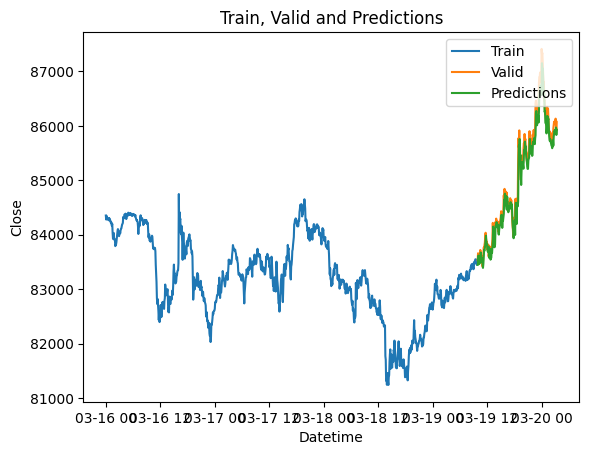

In [29]:
plt.title('Train, Valid and Predictions')
plt.xlabel('Datetime')
plt.ylabel('Close')
 
plt.plot(train['Close'])
plt.plot(valid[['Close']])
plt.plot(predict)
 
plt.legend(['Train', 'Valid', 'Predictions'], loc='upper right')
 
plt.show()

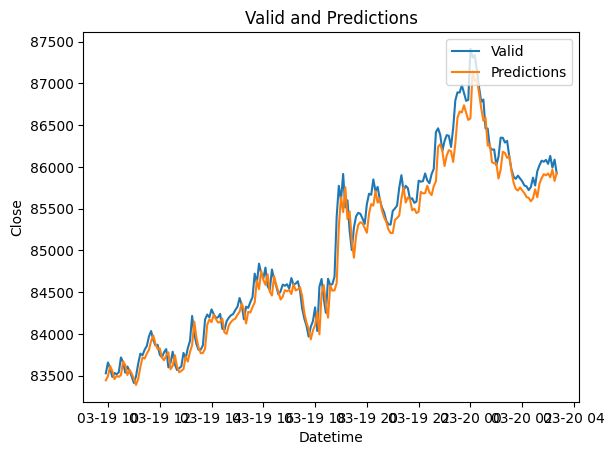

In [30]:
plt.title('Valid and Predictions')
plt.xlabel('Datetime')
plt.ylabel('Close')

plt.plot(valid[['Close']])
plt.plot(predict)
 
plt.legend(['Valid', 'Predictions'], loc='upper right')
 
plt.show()

In [31]:
closing_prices = scaled_data[len(scaled_data)-lookback:]
closing_prices = closing_prices.reshape(closing_prices.shape[0], 1)
print(closing_prices)

[[0.49777785]
 [0.50921258]
 [0.51846059]
 [0.56417294]
 [0.54564275]
 [0.5834738 ]
 [0.56498157]
 [0.55487558]
 [0.57599111]
 [0.54002789]
 [0.53235285]
 [0.57219345]
 [0.55318745]
 [0.53978619]
 [0.52382109]
 [0.52985483]
 [0.54288151]
 [0.54059102]
 [0.54361295]
 [0.53517357]
 [0.55563612]
 [0.54236773]
 [0.54497585]
 [0.54933158]
 [0.53127721]
 [0.4966693 ]
 [0.477066  ]
 [0.46337747]
 [0.44213286]
 [0.46111229]
 [0.47215473]
 [0.49874593]
 [0.45299308]
 [0.53880545]
 [0.55388219]
 [0.5156791 ]
 [0.48821853]
 [0.55429473]
 [0.54221208]
 [0.54378126]
 [0.55838851]
 [0.67459733]
 [0.73456007]
 [0.7064693 ]
 [0.75752951]
 [0.69248087]
 [0.70644273]
 [0.64754424]
 [0.6100612 ]
 [0.65346282]
 [0.6754009 ]
 [0.68210406]
 [0.68012488]
 [0.67073007]
 [0.66064812]
 [0.69921946]
 [0.71918342]
 [0.71710426]
 [0.74683381]
 [0.72389474]
 [0.73239613]
 [0.70738297]
 [0.69237457]
 [0.68288232]
 [0.66670083]
 [0.65964208]
 [0.65929281]
 [0.68589033]
 [0.6905814 ]
 [0.69629497]
 [0.73078266]
 [0.75

In [32]:
current_batch = closing_prices.reshape(1, lookback, 1)
print(current_batch)

[[[0.49777785]
  [0.50921258]
  [0.51846059]
  [0.56417294]
  [0.54564275]
  [0.5834738 ]
  [0.56498157]
  [0.55487558]
  [0.57599111]
  [0.54002789]
  [0.53235285]
  [0.57219345]
  [0.55318745]
  [0.53978619]
  [0.52382109]
  [0.52985483]
  [0.54288151]
  [0.54059102]
  [0.54361295]
  [0.53517357]
  [0.55563612]
  [0.54236773]
  [0.54497585]
  [0.54933158]
  [0.53127721]
  [0.4966693 ]
  [0.477066  ]
  [0.46337747]
  [0.44213286]
  [0.46111229]
  [0.47215473]
  [0.49874593]
  [0.45299308]
  [0.53880545]
  [0.55388219]
  [0.5156791 ]
  [0.48821853]
  [0.55429473]
  [0.54221208]
  [0.54378126]
  [0.55838851]
  [0.67459733]
  [0.73456007]
  [0.7064693 ]
  [0.75752951]
  [0.69248087]
  [0.70644273]
  [0.64754424]
  [0.6100612 ]
  [0.65346282]
  [0.6754009 ]
  [0.68210406]
  [0.68012488]
  [0.67073007]
  [0.66064812]
  [0.69921946]
  [0.71918342]
  [0.71710426]
  [0.74683381]
  [0.72389474]
  [0.73239613]
  [0.70738297]
  [0.69237457]
  [0.68288232]
  [0.66670083]
  [0.65964208]
  [0.65929

In [33]:
predictions = []
time = int(24*60/5/2)
for i in range(time):  # Predicting 12 hours
    # Get the prediction (next hour)
    next_prediction = model.predict(current_batch)
    # print(scaler.inverse_transform(next_prediction))
    # Reshape the prediction to fit the batch dimension
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
    
    # Append the prediction to the batch used for predicting
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)
    
    # Inverse transform the prediction to the original price scale
    predictions.append(scaler.inverse_transform(next_prediction)[0, 0])
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/

In [34]:
last_time = crypto_data_close.index[-1]
next_time = last_time + pd.Timedelta(minutes=5)
prediction_times = pd.date_range(start=next_time, periods=len(predictions), freq='5min')
predict = pd.DataFrame(index=prediction_times, data=predictions, columns=['Close'])
print(predict)

                                  Close
2025-03-20 03:25:00+00:00  85768.382812
2025-03-20 03:30:00+00:00  85625.906250
2025-03-20 03:35:00+00:00  85497.351562
2025-03-20 03:40:00+00:00  85380.046875
2025-03-20 03:45:00+00:00  85271.875000
...                                 ...
2025-03-20 15:00:00+00:00  82105.476562
2025-03-20 15:05:00+00:00  82098.539062
2025-03-20 15:10:00+00:00  82091.671875
2025-03-20 15:15:00+00:00  82084.859375
2025-03-20 15:20:00+00:00  82078.109375

[144 rows x 1 columns]


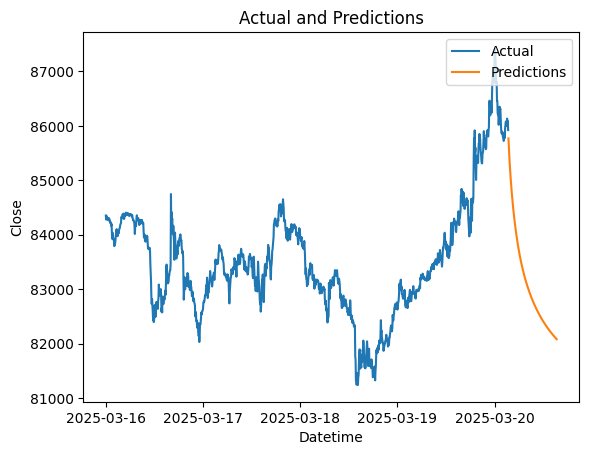

In [35]:
plt.title('Actual and Predictions')
plt.xlabel('Datetime')
plt.ylabel('Close')

plt.plot(crypto_data_close[['Close']])
plt.plot(predict)
 
plt.legend(['Actual', 'Predictions'], loc='upper right')
 
plt.show()

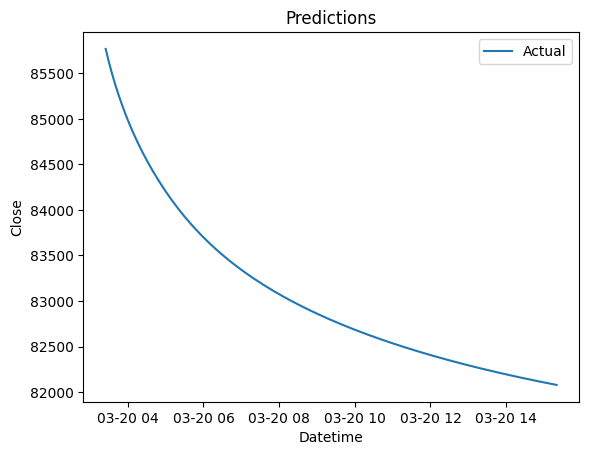

In [36]:
plt.title('Predictions')
plt.xlabel('Datetime')
plt.ylabel('Close')

plt.plot(predict)
 
plt.legend(['Actual', 'Predictions'], loc='upper right')
 
plt.show()